# Seed Spacing Intial Apporach

The goal of this project is to figure out the distance between 2 seeds from a video feed provided with gps data

In [1]:
from utils.filehandling import LoadFilesWithExtensions
import pandas as pd
import os
import torch
import torchvision
import numpy as np
from seed_distance_estimator import *


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [11]:
# Loading Trained CNN Model, CSV File Containing GPS information and the path of video file

model_path = "CNNModels/retina_fp_50.pth"
retina_net = RetinaNetSeedPredictor("Retina Net 18", model_path, device)
video_file = "exp2/video_data/6-28-2021_4-04-37 PM.avi"
csv_file = "exp2/gps_frame/1inch_4mph.csv"
csv_data_frame = pd.read_csv(csv_file)
csv_data_frame.head()

,Time - UTC,Amplitude - UTC,Time - Long,Amplitude - Long,Time - Lat,Amplitude - Lat,Time - Ht1,Amplitude - Ht1,Time - Ht2,Amplitude - Ht2,Time - Ht3,Amplitude - Ht3,Time - Ht4,Amplitude - Ht4,Time - Vel,Amplitude - Vel,Time - Heading,Amplitude - Heading
0,0,210619.1,0,96.513964,0,39.424320,0,183.389225,0,21.176232,0,54.160157,0,37.507268,0,6.4100,0,182.343
1,1,210619.1,1,96.513964,1,39.424320,1,57.101139,1,8.256403,1,0.555488,1,28.489529,1,6.4100,1,182.343
2,2,210619.2,2,96.513964,2,39.424318,2,54.916345,2,4.417093,2,9.418353,2,30.213755,2,6.5535,2,181.403
3,3,210619.2,3,96.513964,3,39.424318,3,32.261195,3,44.623085,3,8.894750,3,102.231336,3,6.5535,3,181.403
4,4,210619.2,4,96.513964,4,39.424318,4,41.248996,4,40.842488,4,6.944034,4,177.594689,4,6.5535,4,181.403


In [12]:
spc = SeedSpacingCalculator(video_file_path=video_file, csv_data_frame=csv_data_frame, Model=retina_net, x_factor=0.13335)
spc.seek(0.2)
#spc.seek_frame(830)
distances = spc.getSpacing(max_count=None, threshold=0.25, reset=False)

0


In [4]:
test1 = distance_struct()
test1.cum_distance = -1
m1 = np.linspace(-1, 5, 7)
print(m1)
m1[test1.filter_out_seen_seeds(m1, 0.5, 2)]

[-1.  0.  1.  2.  3.  4.  5.]


array([2., 3., 4., 5.])

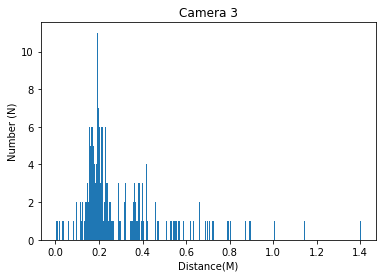

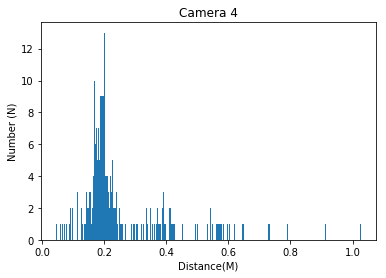

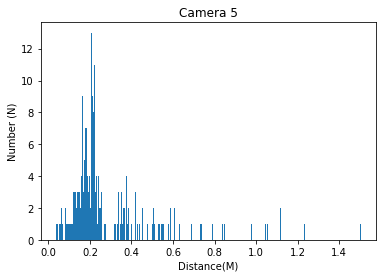

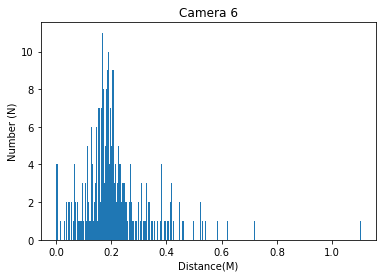

In [13]:
# Histograms

import matplotlib.pyplot as plot 
%matplotlib inline

n_bins = 300
for i in range(4):
    plot.hist([seed_attribute.distance for seed_attribute in distances[i].seed_attributes], bins=n_bins)
    plot.title('Camera {}'.format(i+3))
    plot.xlabel("Distance(M)")
    plot.ylabel("Number (N)")
    plot.savefig("Hist_{}.png".format(i))
    plot.show()

In [69]:
import utm
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

lat_col, long_col = 'Amplitude - Lat', 'Amplitude - Long' 
lat_long = list(zip(csv_data_frame[lat_col][spc.seeked::4], -csv_data_frame[long_col][spc.seeked::4]))
utm_cords = [utm.from_latlon(lat, long) for lat, long in lat_long]

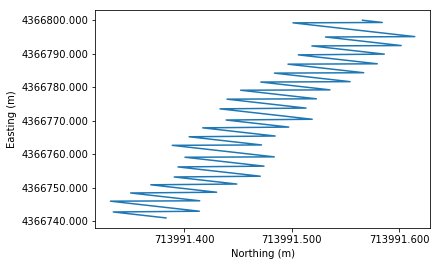

In [76]:
e, n, zones, letter = zip(*utm_cords)
le, de, ln, dn = min(e), max(e) - min(e), min(n), max(n) - min(n)
limiter = de
if(dn > de):
    limiter = dn
e_limits = (le, le + limiter)
n_limits = (ln, ln + limiter)
fig, ax = plt.subplots()
ax.plot(e, n)
Easting, Northing, _, _ = utm.from_latlon(39.4239257, -96.5139257)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Northing (m)")
ax.set_ylabel("Easting (m)")
ax.locator_params(axis='x', nbins=4)


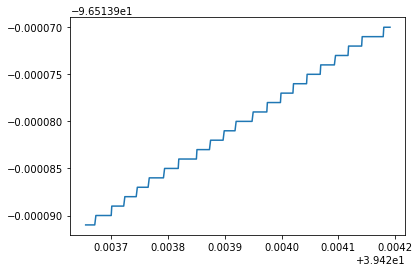

In [61]:
plt.plot(csv_data_frame[lat_col][323::4], -csv_data_frame[long_col][323::4])

In [26]:
a = list(range(10))
a[::2]

[0, 2, 4, 6, 8]

In [37]:
import Proj

ModuleNotFoundError: No module named 'Proj'

In [38]:
!pip install pyproj

     |████████████████████████████████| 6.3 MB 3.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/harsha/Desktop/YoloR/seed_spacing/bin/python -m pip install --upgrade pip' command.


In [48]:
utm.from_latlon(39.4239257, -96.5139257)

(713996.1763280682, 4366771.152407691, 14, 'S')

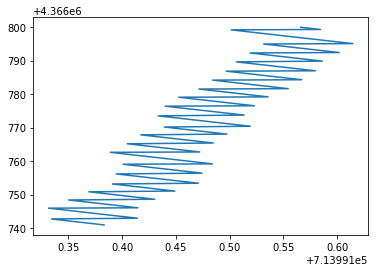

In [75]:
plt.plot(e, n)
plt.plot()